# BUS32120 Week 3 in-class exercise

Import the Iowa school district expenditures csv from Canvas. Then, working alone or with people around you: 

1. Create at least two charts
2. Create at least two tables 
3. Create any other useful EDA (exploratory data analysis)

Hints: 
* There are two versions of the csv, raw and fixed. The raw version is as I downloaded it from the website and the numbers will import as strings (they have commas in them). If you'd like an extra challenge, work with the raw csv and figure out how to cast them to numbers! You may have to google to find out how to remove the commas (I will share that code in a few days, once everyone's had a shot to attempt it). The "fixed" version has been changed to remove the commas and the numbers will import as numbers with no extra work.
* If you need more info on the data, it came from here: https://data.iowa.gov/School-Finance/Iowa-School-District-Expenditures-by-Fiscal-Year/uutu-bzs3
* What's the min, max and median for numeric columns? Is there an easy way to get the seven number statistical summary for every numeric column in a Pandas dataframe? Hmmm
* Think of ways to use `groupby`

... the rest of this notebook is left intentionally blank! This is how your midterm and final will look. It's also how your work in the real world will look. I don't want you to be scared of a blank Jupyter notebook, so Jian/Brandon and I will walk around to help you get started. 

In [2]:
# write some code here :)

# import libraries: matplotlib for plotting, numpy for data arrays, pandas for dataframes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

In [3]:
# import csv file
iaschool_df = pd.read_csv('Iowa_School_District_Expenditures_by_Fiscal_Year-EASY.csv')

# show me the data!
iaschool_df

,FiscalYear,Actual_ReEstimated_Budget,AEA,Dist,DE_District,District Name,Column Name,Fund,Source,Expenditures Per Pupil,Amount,Enrollment Category,Enrollment Category Number
0,2017,Actual,7,9,9,AGWSR,geninstr,General,Instruction,7989,4997256,600-999,3
1,2017,Actual,7,9,9,AGWSR,actinstr,Activity,Instruction,270,169031,600-999,3
2,2017,Actual,7,9,9,AGWSR,mgmntinstr,Management,Instruction,244,152484,600-999,3
3,2017,Actual,7,9,9,AGWSR,perlinstr,PERL,Instruction,0,0,600-999,3
4,2017,Actual,7,9,9,AGWSR,entreinstr,Entrepreneurial_Reorganization,Instruction,0,0,600-999,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347827,2022,Actual,11,7110,7110,Woodward-Granger,ppelendfb,PPEL,Ending Fund Balance,1070,1110195,"1,000-2,499",4
347828,2022,Actual,11,7110,7110,Woodward-Granger,capprojendfb,Other Capital Projects,Ending Fund Balance,0,0,"1,000-2,499",4
347829,2022,Actual,11,7110,7110,Woodward-Granger,debtendfb,Debt Service,Ending Fund Balance,-30,-31081,"1,000-2,499",4
347830,2022,Actual,11,7110,7110,Woodward-Granger,lunchendfb,Nutrition,Ending Fund Balance,491,509631,"1,000-2,499",4


In [4]:
# looks like we need to rename a column
# what are the unique values in the column?
values_column_name = iaschool_df['Column Name'].unique()

values_column_name

array(['geninstr', 'actinstr', 'mgmntinstr', 'perlinstr', 'entreinstr',
       'emglevyinstr', 'saveinstr', 'ppelinstr', 'capprojinstr',
       'debtinstr', 'lunchinstr', 'entinstr', 'genstudsupp',
       'actstudsupp', 'mgmntstudsupp', 'perlstudsupp', 'entrestudsupp',
       'emglevystudsupp', 'savestudsupp', 'ppelstudsupp',
       'capprojstudsupp', 'debtstudsupp', 'lunchstudsupp', 'entstudsupp',
       'geninstrsupp', 'actinstrsupp', 'mgmntinstrsupp', 'perlinstrsupp',
       'entreinstrsupp', 'emglevyinstrsupp', 'saveinstrsupp',
       'ppelinstrsupp', 'capprojinstrsupp', 'debtinstrsupp',
       'lunchinstrsupp', 'entinstrsupp', 'gengenadmin', 'actgenadmin',
       'mgmntgenadmin', 'perlgenadmin', 'entregenadmin',
       'emglevygenadmin', 'savegenadmin', 'ppelgenadmin', 'ppeltransp',
       'capprojgenadmin', 'debtgenadmin', 'lunchgenadmin', 'entgenadmin',
       'genbldgadmin', 'actbldgadmin', 'mgmntbldgadmin', 'perlbldgadmin',
       'entrebldgadmin', 'emglevybldgadmin', 'savebld

In [5]:
# seriously, what are those?
iaschool_df = iaschool_df.rename(columns={'Column Name': 'Fund-Source ID'})

In [6]:
# trying to understand what's in the rest of columns
values_fund = iaschool_df['Fund'].unique()

values_fund

array(['General', 'Activity', 'Management', 'PERL',
       'Entrepreneurial_Reorganization', 'Emergency_Disaster',
       'Sales Tax', 'PPEL', 'Other Capital Projects', 'Debt Service',
       'Nutrition', 'Enterprise'], dtype=object)

In [7]:
values_source = iaschool_df['Source'].unique()

values_source

array(['Instruction', 'Student Support Services',
       'Instructional Staff Support Services', 'General Administration',
       'Student Transportation', 'School/Building Administration',
       'Business & Central Administration',
       'Plant Operation and Maintenance', 'Noninstructional Programs',
       'Facilities Acquisition and Construction',
       'Debt Service (Principal, interest, fiscal charges)',
       'AEA Support - Direct to AEA',
       'Transfers Out/Special Items/Down Adj', 'Ending Fund Balance',
       'Transfers Out'], dtype=object)

In [8]:
# gives a summary of the data
# no missing data according to this
iaschool_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347832 entries, 0 to 347831
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   FiscalYear                  347832 non-null  int64 
 1   Actual_ReEstimated_Budget   347832 non-null  object
 2   AEA                         347832 non-null  int64 
 3   Dist                        347832 non-null  int64 
 4   DE_District                 347832 non-null  int64 
 5   District Name               347832 non-null  object
 6   Fund-Source ID              347832 non-null  object
 7   Fund                        347832 non-null  object
 8   Source                      347832 non-null  object
 9   Expenditures Per Pupil      347832 non-null  int64 
 10  Amount                      347832 non-null  int64 
 11  Enrollment Category         347832 non-null  object
 12  Enrollment Category Number  347832 non-null  int64 
dtypes: int64(7), object(6)
memory

In [9]:
# show basic stats for numerical columns
# doesn't really tell us much that I can tell - a lot of zeroes in some columns and some negative numbers
# not sure if negatives and zeroes are bad or erroneous - could just be no expense or reimbursements or overbudget
iaschool_df.describe()

,FiscalYear,AEA,Dist,DE_District,Expenditures Per Pupil,Amount,Enrollment Category Number
count,347832.000000,347832.000000,347832.000000,347832.000000,347832.000000,3.478320e+05,347832.000000
mean,2019.529911,9.531705,3628.318292,3641.813082,153.477294,2.137606e+05,2.934003
std,1.702426,3.710020,2183.755655,2193.183393,861.769623,2.383155e+06,1.264738
min,2017.000000,1.000000,9.000000,9.000000,-2505.000000,-3.530825e+06,1.000000
25%,2018.000000,7.000000,1619.000000,1619.000000,0.000000,0.000000e+00,2.000000
50%,2020.000000,10.000000,3645.000000,3691.000000,0.000000,0.000000e+00,3.000000
75%,2021.000000,12.000000,5697.000000,5751.000000,0.000000,0.000000e+00,4.000000
max,2022.000000,15.000000,7110.000000,7110.000000,41821.000000,2.765440e+08,6.000000


In [10]:
# condense this data into columns I want to work with
new_ias_df = iaschool_df[['FiscalYear',	'District Name', 'Fund', 'Source', 'Expenditures Per Pupil', 'Amount', 'Enrollment Category Number']]

# convert Amount column to be denominated in millions
convert_to_millions = ['Amount']
new_ias_df[convert_to_millions] = new_ias_df[convert_to_millions] / 1000000

# test if change worked
new_ias_df


/tmp/ipykernel_310/4288885424.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ias_df[convert_to_millions] = new_ias_df[convert_to_millions] / 1000000


,FiscalYear,District Name,Fund,Source,Expenditures Per Pupil,Amount,Enrollment Category Number
0,2017,AGWSR,General,Instruction,7989,4.997256,3
1,2017,AGWSR,Activity,Instruction,270,0.169031,3
2,2017,AGWSR,Management,Instruction,244,0.152484,3
3,2017,AGWSR,PERL,Instruction,0,0.000000,3
4,2017,AGWSR,Entrepreneurial_Reorganization,Instruction,0,0.000000,3
...,...,...,...,...,...,...,...
347827,2022,Woodward-Granger,PPEL,Ending Fund Balance,1070,1.110195,4
347828,2022,Woodward-Granger,Other Capital Projects,Ending Fund Balance,0,0.000000,4
347829,2022,Woodward-Granger,Debt Service,Ending Fund Balance,-30,-0.031081,4
347830,2022,Woodward-Granger,Nutrition,Ending Fund Balance,491,0.509631,4


In [11]:
# remove rows with Ending Fund Balance values
value_to_remove = 'Ending Fund Balance'
mask = new_ias_df['Source'] != value_to_remove
new_ias_df = new_ias_df[mask]

new_ias_df

,FiscalYear,District Name,Fund,Source,Expenditures Per Pupil,Amount,Enrollment Category Number
0,2017,AGWSR,General,Instruction,7989,4.997256,3
1,2017,AGWSR,Activity,Instruction,270,0.169031,3
2,2017,AGWSR,Management,Instruction,244,0.152484,3
3,2017,AGWSR,PERL,Instruction,0,0.000000,3
4,2017,AGWSR,Entrepreneurial_Reorganization,Instruction,0,0.000000,3
...,...,...,...,...,...,...,...
347815,2022,Woodward-Granger,PPEL,Transfers Out/Special Items/Down Adj,0,0.000000,4
347816,2022,Woodward-Granger,Other Capital Projects,Transfers Out/Special Items/Down Adj,0,0.000000,4
347817,2022,Woodward-Granger,Debt Service,Transfers Out/Special Items/Down Adj,0,0.000000,4
347818,2022,Woodward-Granger,Nutrition,Transfers Out/Special Items/Down Adj,6,0.006180,4


In [12]:
# district total expenses 2017-2022
new_ias_df.groupby('District Name').Amount.sum()

District Name
AGWSR                   69.336102
AHSTW                   76.529907
Adair-Casey             32.192107
Adel DeSoto Minburn     51.382601
Adel-Desoto-Minburn    144.431818
                          ...    
Winfield-Mt Union       39.488173
Winterset              190.008256
Woodbine                46.932496
Woodbury Central        54.421947
Woodward-Granger       132.652121
Name: Amount, Length: 368, dtype: float64

In [13]:
# total expenses by year
# kind of wish I had the number of students per district
new_ias_df.groupby('FiscalYear').Amount.sum()

FiscalYear
2017     8232.591184
2018     8159.323794
2019     8541.714646
2020     9034.675620
2021     9508.831290
2022    10042.995305
Name: Amount, dtype: float64

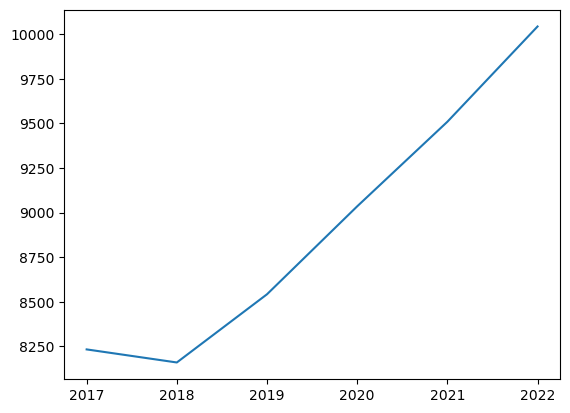

In [14]:
# plot total expenses by year (time series)
plt.plot(new_ias_df.groupby('FiscalYear').Amount.sum())

In [15]:
# group total expense amounts by year and fund

grouped_df = new_ias_df.groupby(['FiscalYear', 'Fund'])['Amount'].sum()
grouped_df = grouped_df.reset_index()

grouped_df

,FiscalYear,Fund,Amount
0,2017,Activity,116.088284
1,2017,Debt Service,870.892215
2,2017,Emergency_Disaster,0.102946
3,2017,Enterprise,42.553117
4,2017,Entrepreneurial_Reorganization,2.144084
...,...,...,...
67,2022,Nutrition,312.990097
68,2022,Other Capital Projects,557.697619
69,2022,PERL,2.708994
70,2022,PPEL,294.426885


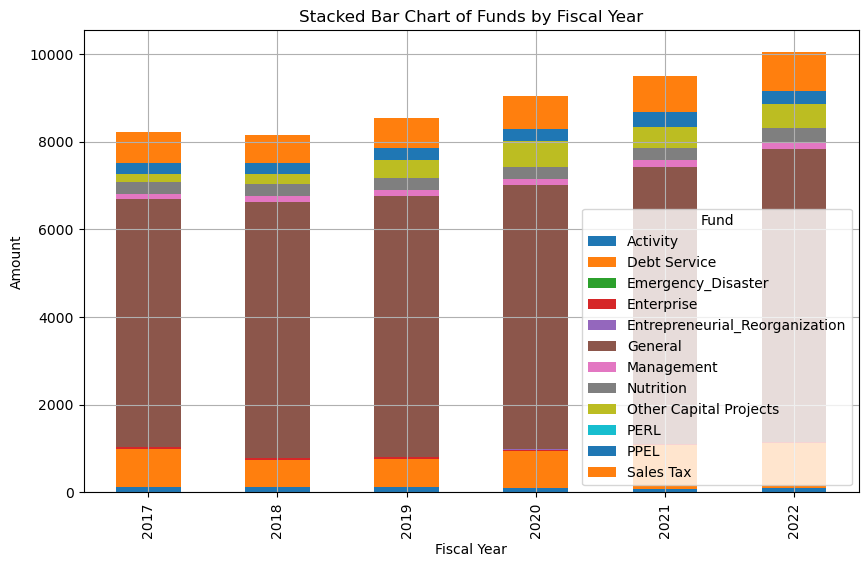

In [16]:
# pivoting the DataFrame to get desired structure for plotting
grouped_df_pivot = grouped_df.pivot(index='FiscalYear', columns='Fund', values='Amount')

# plotting the stacked bar chart
grouped_df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# add labels, title, and legend
plt.xlabel('Fiscal Year')
plt.ylabel('Amount')
plt.title('Stacked Bar Chart of Funds by Fiscal Year')
plt.legend(title='Fund')
plt.grid(True)


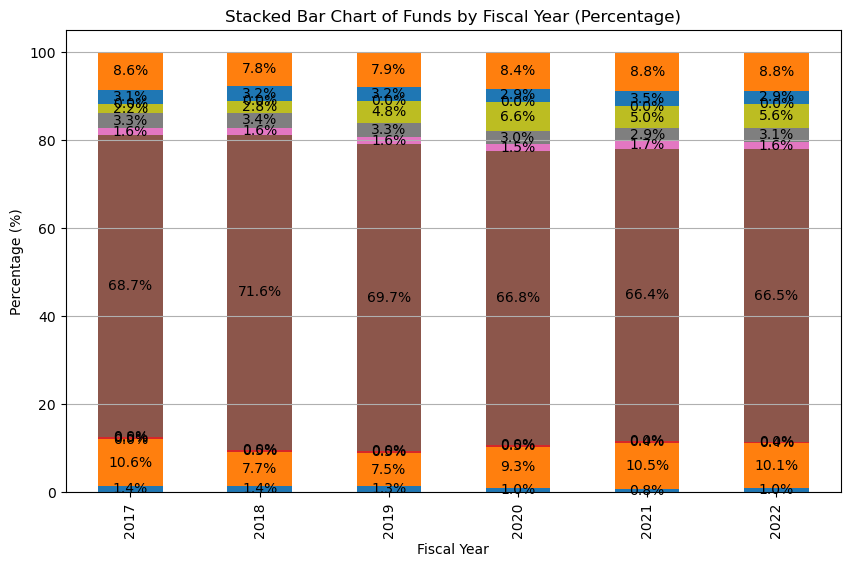

In [23]:
# Calculating the percentage of the total for each bar segment
grouped_df_pivot_percent = grouped_df_pivot.div(grouped_df_pivot.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
ax = grouped_df_pivot_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels, title
plt.xlabel('Fiscal Year')
plt.ylabel('Percentage (%)')
plt.title('Stacked Bar Chart of Funds by Fiscal Year (Percentage)')
plt.grid(True, axis='y')

ax.legend().remove()

# Add percentage data labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only add a label if the bar segment has a height
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', fontsize=10, color='black')

In [ ]:
# Expenses have gone up every subsequent year, except from 2017 to 2018.
# Proportionately, capital project expenses have been going up faster than everything else
# There are a lot of empty accounts ($0.00 expenses). I wonder if allocations are appropriate.


If you complete the above and need more practice, do the same thing on the [Iowa unemployment insurance payments](https://data.iowa.gov/Economic-Statistics/Iowa-Unemployment-Insurance-Benefit-Payments-and-R/aeyn-twxp) dataset (on Canvas).